In [1]:
import numpy as np
import pandas as pd

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
queen_train_path = "../../feature_extraction/CQT_168_features/train/train_queen.npy"
queenless_train_path = "../../feature_extraction/CQT_168_features/train/train_queenless.npy"
queen_test_path = "../../feature_extraction/CQT_168_features/test/train_queen.npy"
queenless_test_path = "../../feature_extraction/CQT_168_features/test/train_queenless.npy"
queen_val_path = "../../feature_extraction/CQT_168_features/val/train_queen.npy"
queenless_val_path = "../../feature_extraction/CQT_168_features/val/train_queenless.npy"

In [3]:
queen_train = np.load(queen_train_path)
queenless_train = np.load(queenless_train_path)
queen_test = np.load(queen_test_path)
queenless_test = np.load(queenless_test_path)
queen_val = np.load(queen_val_path)
queenless_val = np.load(queenless_val_path)


In [4]:
train_label = pd.DataFrame(np.hstack([[0]*7000, [1]*7000]).T, columns=['labels'])


In [5]:
train_data = pd.DataFrame(np.vstack([queen_train, queenless_train]))



In [6]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,-0.001204,-0.000792,-0.000935,-0.000434,-0.000146,-0.000013,-0.000022,-0.000113,-0.000206,0.000025,...,0.000254,0.000191,0.000192,0.000227,0.000203,0.000190,0.000178,0.000223,0.000200,0.000215
1,-0.002073,-0.000457,-0.000002,-0.000048,-0.000007,0.000081,0.000103,0.000013,-0.000222,-0.000004,...,0.000243,0.000209,0.000198,0.000174,0.000170,0.000152,0.000161,0.000177,0.000176,0.000153
2,0.002389,-0.000011,-0.000418,0.000246,0.000913,0.000521,0.000279,0.000220,0.000039,-0.000509,...,0.000301,0.000272,0.000264,0.000250,0.000269,0.000260,0.000246,0.000236,0.000246,0.000248
3,0.002736,0.000186,0.000200,0.000239,-0.000083,-0.000013,0.000017,-0.000129,-0.000024,0.000076,...,0.000261,0.000240,0.000216,0.000242,0.000229,0.000190,0.000182,0.000182,0.000166,0.000143
4,0.000580,-0.000183,-0.000545,-0.000174,-0.000004,-0.000035,-0.000057,-0.000021,0.000051,0.000071,...,0.000207,0.000195,0.000170,0.000178,0.000173,0.000139,0.000120,0.000139,0.000150,0.000167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.002093,0.000245,0.000134,0.000243,-0.000030,-0.000015,0.000094,-0.000098,-0.000179,-0.000160,...,0.000162,0.000153,0.000151,0.000153,0.000129,0.000118,0.000107,0.000089,0.000092,0.000085
13996,-0.000034,0.000458,0.000223,0.000028,-0.000006,0.000008,-0.000028,0.000002,-0.000025,0.000038,...,0.000189,0.000181,0.000157,0.000155,0.000144,0.000123,0.000109,0.000107,0.000098,0.000099
13997,-0.001484,-0.000840,0.000233,0.000157,-0.000078,0.000068,0.000171,0.000155,0.000065,-0.000045,...,0.000182,0.000180,0.000171,0.000143,0.000136,0.000119,0.000122,0.000114,0.000083,0.000085
13998,-0.000702,0.000691,0.000308,-0.000119,-0.000262,-0.000349,-0.000279,-0.000161,-0.000165,-0.000225,...,0.000180,0.000184,0.000163,0.000158,0.000155,0.000127,0.000124,0.000115,0.000113,0.000104


In [7]:
queenless_test.shape

(2000, 168)

In [8]:
test_label = pd.DataFrame(np.hstack([[0]*3000, [1]*3000]).T, columns=['labels'])
test_data = pd.DataFrame(np.vstack([queen_test, queen_val, queenless_test, queenless_val]))



In [9]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_data)

In [11]:
X_test_scaled = scaler.transform(test_data)

In [12]:
X_scaled

array([[-0.20662722, -0.73645841, -2.09800674, ..., -0.19180578,
        -0.21399531, -0.11052574],
       [-0.35557238, -0.42674533, -0.01300731, ..., -0.30899948,
        -0.28551923, -0.32501644],
       [ 0.40949854, -0.01400246, -0.94300971, ..., -0.15955963,
        -0.07838037,  0.00750504],
       ...,
       [-0.2546584 , -0.7801804 ,  0.51151426, ..., -0.46989339,
        -0.55788642, -0.5612307 ],
       [-0.12059098,  0.63574075,  0.68079501, ..., -0.46713472,
        -0.46976624, -0.49532688],
       [-0.06614687, -0.35411998, -0.41962934, ..., -0.53167524,
        -0.54984696, -0.56230223]])

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [14]:
logistic_search = {'penalty' : ['l1', 'l2', 'elasticnet', None],
                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
                    }

In [15]:
import time
from sklearn.linear_model import LogisticRegression

t1 = time.time()
base_model = LogisticRegression(max_iter=1000)

clf = RandomizedSearchCV(base_model, logistic_search, scoring='accuracy', n_iter=100, random_state=1337, verbose=3)
clf.fit(X_scaled, np.array(train_label).ravel())
# clf.grid_scores_
t2 = time.time()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=100, penalty=None, solver=sag;, score=0.671 total time=  14.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=100, penalty=None, solver=sag;, score=0.804 total time=  13.7s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=100, penalty=None, solver=sag;, score=0.718 total time=  13.8s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ...C=100, penalty=None, solver=sag;, score=0.696 total time=  13.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=100, penalty=None, solver=sag;, score=0.665 total time=  14.0s
[CV 1/5] END C=0.01, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l2, solver=liblinear;, score=0.676 total time=   0.9s
[CV 2/5] END .C=1, penalty=l2, solver=liblinear;, score=0.804 total time=   1.2s
[CV 3/5] END .C=1, penalty=l2, solver=liblinear;, score=0.714 total time=   1.0s
[CV 4/5] END .C=1, penalty=l2, solver=liblinear;, score=0.701 total time=   0.8s
[CV 5/5] END .C=1, penalty=l2, solver=liblinear;, score=0.675 total time=   1.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=10, penalty=l2, solver=sag;, score=0.671 total time=  13.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=10, penalty=l2, solver=sag;, score=0.803 total time=  13.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=10, penalty=l2, solver=sag;, score=0.717 total time=  13.7s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=10, penalty=l2, solver=sag;, score=0.697 total time=  14.5s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=10, penalty=l2, solver=sag;, score=0.665 total time=  13.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=100, penalty=l2, solver=sag;, score=0.671 total time=  13.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=100, penalty=l2, solver=sag;, score=0.804 total time=  13.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=100, penalty=l2, solver=sag;, score=0.717 total time=  13.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=100, penalty=l2, solver=sag;, score=0.696 total time=  15.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=100, penalty=l2, solver=sag;, score=0.665 total time=  15.1s
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.734 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.670 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 1/5] END C=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END .......C=0.1, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5]

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.680 total time=   2.9s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.802 total time=   2.8s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.705 total time=   3.4s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.695 total time=   2.8s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.677 total time=   2.5s
[CV 1/5] END C=1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.00

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.680 total time=  11.9s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.803 total time=   8.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.705 total time=   8.8s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.696 total time=   9.8s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, penalty=None, solver=newton-cg;, score=0.676 total time=   8.9s
[CV 1/5] END C=0.01, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.680 total time=   0.2s
[CV 2/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.803 total time=   0.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.705 total time=   0.1s
[CV 4/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.695 total time=   0.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.001, penalty=None, solver=newton-cholesky;, score=0.676 total time=   0.2s
[CV 1/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.677 total time=   0.2s
[CV 2/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.695 total time=   0.3s
[CV 3/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.737 total time=   0.3s
[CV 4/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.678 total time=   0.5s
[CV 5/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.576 total time=   0.4s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.680 total time=  21.8s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.756 total time=  23.4s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.739 total time=  23.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.690 total time=  22.7s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.638 total time=  22.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.673 total time=  16.3s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.761 total time=  16.9s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.734 total time=  16.6s
[CV 4/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.683 total time=  14.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.1, penalty=l2, solver=saga;, score=0.621 total time=  15.5s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.634 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.550 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.659 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.653 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.344 total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.671 total time=   0.4s
[CV 2/5] END

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.677 total time=   3.6s
[CV 2/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.695 total time=   3.7s
[CV 3/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.737 total time=   4.1s
[CV 4/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.678 total time=   3.1s
[CV 5/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.576 total time=   4.0s
[CV 1/5] END C=0.01, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, penalty=None, solver=newton-cg;, score=0.680 total time=   8.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, penalty=None, solver=newton-cg;, score=0.803 total time=   6.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, penalty=None, solver=newton-cg;, score=0.705 total time=   6.8s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.01, penalty=None, solver=newton-cg;, score=0.696 total time=   7.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.01, penalty=None, solver=newton-cg;, score=0.676 total time=   7.7s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=100, penalty=None, solver=newton-cg;, score=0.680 total time=  10.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=100, penalty=None, solver=newton-cg;, score=0.803 total time=   8.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=100, penalty=None, solver=newton-cg;, score=0.705 total time=   6.7s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=100, penalty=None, solver=newton-cg;, score=0.696 total time=   6.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=100, penalty=None, solver=newton-cg;, score=0.676 total time=   7.0s
[CV 1/5] END C=100, penalty=l2, solver=liblinear;, score=0.680 total time=   3.7s
[CV 2/5] END C=100, penalty=l2, solver=liblinear;, score=0.802 total time=   5.4s
[CV 3/5] END C=100, penalty=l2, solver=liblinear;, score=0.705 total time=   4.4s
[CV 4/5] END C=100, penalty=l2, solver=liblinear;, score=0.695 total time=   4.3s
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.677 total time=   2.7s
[CV 1/5] END C=10, penalty=None, solver=newton-cholesky;, score=0.680 total time=   0.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10, penalty=None, solver=newton-cholesky;, score=0.803 total time=   0.0s
[CV 3/5] END C=10, penalty=None, solver=newton-cholesky;, score=0.705 total time=   0.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10, penalty=None, solver=newton-cholesky;, score=0.695 total time=   0.0s
[CV 5/5] END C=10, penalty=None, solver=newton-cholesky;, score=0.676 total time=   0.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.680 total time=  13.1s
[CV 2/5]

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.681 total time=   1.4s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.802 total time=   1.4s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.705 total time=   1.5s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.696 total time=   1.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .C=0.1, penalty=None, solver=lbfgs;, score=0.677 total time=   1.5s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ....C=10, penalty=None, solver=sag;, score=0.671 total time=  13.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ....C=10, penalty=None, solver=sag;, score=0.804 total time=  12.9s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ....C=10, penalty=None, solver=sag;, score=0.718 total time=  13.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ....C=10, penalty=None, solver=sag;, score=0.696 total time=  14.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=10, penalty=None, solver=sag;, score=0.665 total time=  14.7s
[CV 1/5] END C=0.001, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.701 total time=  21.6s
[CV 2/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.708 total time=  15.3s
[CV 3/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.745 total time=  15.3s
[CV 4/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.661 total time=  15.8s
[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.554 total time=  15.8s
[CV 1/5] END C=0.1, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, penalty=None, solver=liblinear;, score=nan total time=   0.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logisti

[CV 1/5] END ...C=0.1, penalty=None, solver=sag;, score=0.671 total time=  13.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=0.1, penalty=None, solver=sag;, score=0.804 total time=  12.9s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=0.1, penalty=None, solver=sag;, score=0.718 total time=  13.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ...C=0.1, penalty=None, solver=sag;, score=0.696 total time=  13.5s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logis

[CV 5/5] END ...C=0.1, penalty=None, solver=sag;, score=0.665 total time=  13.3s
[CV 1/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penal

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...C=10, penalty=None, solver=saga;, score=0.672 total time=  15.3s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ...C=10, penalty=None, solver=saga;, score=0.785 total time=  15.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...C=10, penalty=None, solver=saga;, score=0.726 total time=  17.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ...C=10, penalty=None, solver=saga;, score=0.688 total time=  16.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ...C=10, penalty=None, solver=saga;, score=0.649 total time=  16.6s
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ..C=0.01, penalty=None, solver=sag;, score=0.671 total time=  14.7s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ..C=0.01, penalty=None, solver=sag;, score=0.804 total time=  14.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ..C=0.01, penalty=None, solver=sag;, score=0.718 total time=  15.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ..C=0.01, penalty=None, solver=sag;, score=0.696 total time=  15.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=0.01, penalty=None, solver=sag;, score=0.665 total time=  14.4s
[CV 1/5] END C=1000, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=elasticnet, solver=saga;, score=nan tot

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, penalty=None, solver=lbfgs;, score=0.681 total time=   2.5s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, penalty=None, solver=lbfgs;, score=0.802 total time=   2.7s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, penalty=None, solver=lbfgs;, score=0.705 total time=   2.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.01, penalty=None, solver=lbfgs;, score=0.696 total time=   2.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.01, penalty=None, solver=lbfgs;, score=0.677 total time=   3.1s
[CV 1/5] END C=1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.723 total time=   0.8s
[CV 2/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.560 total time=   0.8s
[CV 3/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.596 total time=   0.8s
[CV 4/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.618 total time=   0.7s
[CV 5/5] END ..C=0.001, penalty=l2, solver=saga;, score=0.400 total time=   0.8s
[CV 1/5] END C=10, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END .C=1000, penalty=None, solver=saga;, score=0.672 total time=  16.9s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END .C=1000, penalty=None, solver=saga;, score=0.785 total time=  16.5s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END .C=1000, penalty=None, solver=saga;, score=0.726 total time=  18.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END .C=1000, penalty=None, solver=saga;, score=0.688 total time=  18.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .C=1000, penalty=None, solver=saga;, score=0.649 total time=  16.8s
[CV 1/5] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.672 total time=  10.2s
[CV 2/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.763 total time=   9.5s
[CV 3/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.732 total time=  10.1s
[CV 4/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.683 total time=   7.4s
[CV 5/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.624 total time=   9.8s
[CV 1/5] END C=1000, penalty=l1, solver=liblinear;, score=0.681 total time

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1, penalty=None, solver=saga;, score=0.672 total time=  14.4s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1, penalty=None, solver=saga;, score=0.785 total time=  15.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1, penalty=None, solver=saga;, score=0.726 total time=  15.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1, penalty=None, solver=saga;, score=0.688 total time=  15.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=1, penalty=None, solver=saga;, score=0.649 total time=  16.0s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.1s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.1s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.732 total time=   0.1s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.682 total time=   0.1s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.625 total time=   0.1s
[CV 1/5] END C=0.1, penalty=None, solver=newton-cholesky;, score=0.680 total time=   0.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, penalty=None, solver=newton-cholesky;, score=0.803 total time=   0.1s
[CV 3/5] END C=0.1, penalty=None, solver=newton-cholesky;, score=0.705 total time=   0.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, penalty=None, solver=newton-cholesky;, score=0.695 total time=   0.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, penalty=None, solver=newton-cholesky;, score=0.676 total time=   0.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.672 total time=  23.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l1, solver=saga;, score=0.785 total time=  22.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l1, solver=saga;, score=0.727 total time=  21.9s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l1, solver=saga;, score=0.688 total time=  22.7s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logis

[CV 5/5] END .....C=10, penalty=l1, solver=saga;, score=0.649 total time=  21.3s
[CV 1/5] END C=10, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, penalty=None, solver=liblinear;, score=nan total time=   0.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=1, penalty=None, solver=sag;, score=0.671 total time=  14.4s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=1, penalty=None, solver=sag;, score=0.804 total time=  13.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=1, penalty=None, solver=sag;, score=0.718 total time=  13.7s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=1, penalty=None, solver=sag;, score=0.696 total time=  13.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=1, penalty=None, solver=sag;, score=0.665 total time=  13.1s
[CV 1/5] END C=0.01, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, penalty=l2, solver=saga;, score=0.672 total time=  15.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, penalty=l2, solver=saga;, score=0.785 total time=  15.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=1000, penalty=l2, solver=saga;, score=0.726 total time=  15.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=1000, penalty=l2, solver=saga;, score=0.688 total time=  17.4s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=1000, penalty=l2, solver=saga;, score=0.649 total time=  18.5s
[CV 1/5] END C=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1000, penalty=l1, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=l2, solver=newton-cg;, score=0.676 total time= 

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, penalty=l1, solver=saga;, score=0.672 total time=  23.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, penalty=l1, solver=saga;, score=0.785 total time=  22.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, penalty=l1, solver=saga;, score=0.726 total time=  23.4s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=100, penalty=l1, solver=saga;, score=0.688 total time=  21.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, penalty=l1, solver=saga;, score=0.649 total time=  21.2s
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .......C=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000,

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, penalty=l2, solver=saga;, score=0.672 total time=  14.5s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, penalty=l2, solver=saga;, score=0.781 total time=  14.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=1, penalty=l2, solver=saga;, score=0.725 total time=  13.6s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, penalty=l2, solver=saga;, score=0.687 total time=  13.9s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, penalty=l2, solver=saga;, score=0.647 total time=  13.5s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.680 total time=   9.4s
[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.806 total time=   7.5s
[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.706 total time=   7.2s
[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.698 total time=   9.7s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.678 total time=   5.3s
[CV 1/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.634 total time=   0.6s
[CV 2/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.549 total time=   1.0s
[CV 3/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.662 total time=   6.6s
[CV 4/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.655 total time=   1.5s
[CV 5/5] END ..C=0.001, penalty=l1, solver=saga;, score=0.339 total time=   0.8s
[CV 1/5] END C=1000, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, penal

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:

[CV 1/5] END .....C=10, penalty=l2, solver=saga;, score=0.672 total time=  14.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, penalty=l2, solver=saga;, score=0.785 total time=  14.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, penalty=l2, solver=saga;, score=0.726 total time=  14.5s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, penalty=l2, solver=saga;, score=0.688 total time=  13.7s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END .....C=10, penalty=l2, solver=saga;, score=0.649 total time=  13.6s
[CV 1/5] END C=0.01, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=elasticnet, solv

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10, penalty=None, solver=newton-cg;, score=0.803 total time=   5.2s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10, penalty=None, solver=newton-cg;, score=0.705 total time=   5.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10, penalty=None, solver=newton-cg;, score=0.696 total time=   5.3s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10, penalty=None, solver=newton-cg;, score=0.676 total time=   5.7s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1000, penalty=l2, solver=sag;, score=0.671 total time=  12.3s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1000, penalty=l2, solver=sag;, score=0.804 total time=  11.9s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1000, penalty=l2, solver=sag;, score=0.718 total time=  12.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1000, penalty=l2, solver=sag;, score=0.696 total time=  12.1s


C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    ret

[CV 5/5] END ....C=1000, penalty=l2, solver=sag;, score=0.665 total time=  12.0s
[CV 1/5] END C=10, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ..C=10, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.0

In [16]:
clf.best_params_


{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

In [17]:
print(f"time elapsed: {t2-t1} seconds or {int((t2-t1)//60)} minutes and {int((t2-t1)-(t2-t1)//60*60)} seconds")

time elapsed: 2005.3727283477783 seconds or 33 minutes and 25 seconds


In [18]:
print(accuracy_score(test_label,clf.predict(X_test_scaled)))

0.8175


In [19]:
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay


In [20]:
print(classification_report(test_label,clf.predict(X_test_scaled), target_names=["Queen", "Queenless"]))

              precision    recall  f1-score   support

       Queen       0.81      0.84      0.82      3000
   Queenless       0.83      0.80      0.81      3000

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000



In [21]:
roc_curve(test_label,clf.predict(X_test_scaled))

(array([0.        , 0.16466667, 1.        ]),
 array([0.        , 0.79966667, 1.        ]),
 array([inf,  1.,  0.]))

In [22]:
import matplotlib.pyplot as plt

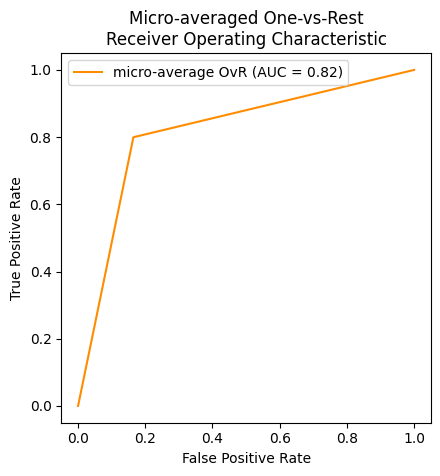

In [23]:
RocCurveDisplay.from_predictions(
    np.array(test_label.values).ravel(),
    np.array(clf.predict(X_test_scaled)).ravel(),
    name="micro-average OvR",
    color="darkorange",

)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

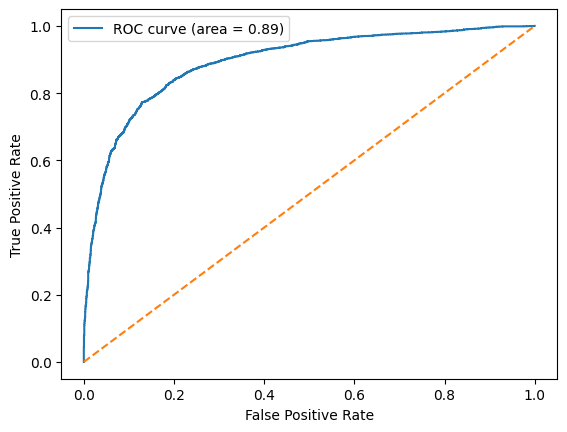

In [24]:
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(test_label, clf.predict_proba(X_test_scaled)[:, 1])

auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC curve (area = {0:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="dashed")
# plt.title("FFT 1D with XGBoost roc_curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix

<Axes: >

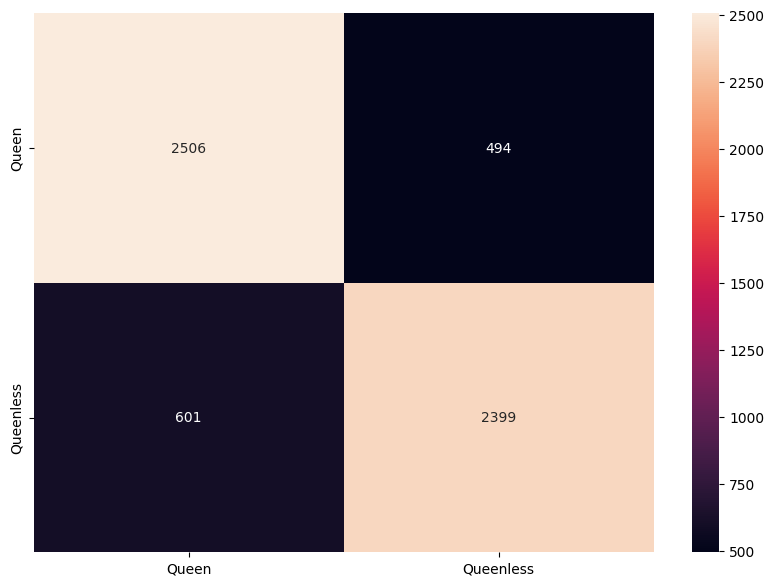

In [26]:
import seaborn as sns

cf_mat = confusion_matrix(test_label, clf.predict(X_test_scaled))
df_cm = pd.DataFrame(cf_mat, index = [i for i in ['Queen', 'Queenless']],
                  columns = [i for i in ['Queen', 'Queenless']])
df_cm_normed = df_cm/df_cm.sum()
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="", )


<Axes: >

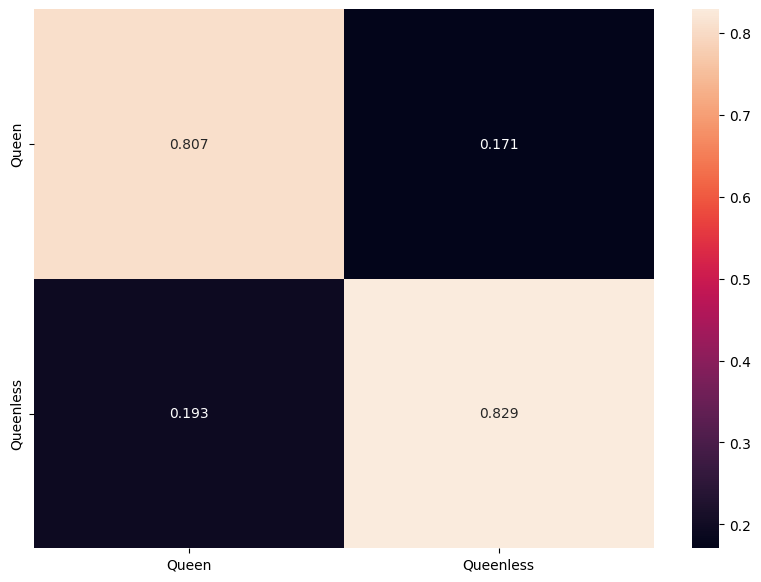

In [27]:
df_cm_normed = df_cm/df_cm.sum()
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_normed, annot=True, fmt=".3f", )